In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pet-sales/pet_sales.csv


# 1. Data Validation & Preparation:
-  As a standard validation step, ensure the sales column is numeric. If it contains non-numeric characters (like '$'), clean the column, convert it to a numeric type, and fill any resulting NaN values with 0.
- Create a new DataFrame named dog_products_df that contains only the data for products where pet_type is 'dog'.

In [90]:
df = pd.read_csv('/kaggle/input/pet-sales/pet_sales.csv')
df['sales'] = df['sales'].str.replace("$", "")
df['sales'] = df['sales'].str.replace(",", "")
df['sales'] = df['sales'].astype(int)
df.fillna(all)
df_dog = df[df['pet_type']== 'dog']
dog_products_df = pd.DataFrame(df_dog)
dog_products_df['price'] = dog_products_df['price'].astype(int)
print(df.head())
print(dog_products_df.info())

   product_id product_category   sales   price vendor_id pet_size pet_type  \
0        5040        Equipment  123000   94.81   VC_1605    small     fish   
1        4567             Toys   61000  120.95   VC_1132    small      cat   
2        4237             Toys  218000  106.34    VC_802    small  hamster   
3        4364            Snack   69000  241.27    VC_929    large      dog   
4        4184      Supplements  138000  133.68    VC_749    large      dog   

   rating  re_buy  
0       7       1  
1      10       0  
2       6       0  
3       1       1  
4      10       0  
<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 3 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        347 non-null    int64 
 1   product_category  347 non-null    object
 2   sales             347 non-null    int64 
 3   price             347 non-null    int64 
 4   vendor_id         347 non-null 

# 2.Analysis & Aggregation:
- Using dog_products_df, calculate the median price for each pet_size category ('extra_small', 'small', 'medium', 'large', 'extra_large').

      pet_size  price
0       medium   91.0
1  extra_small  106.0
2        large  125.0
3  extra_large  135.0
4        small  143.0


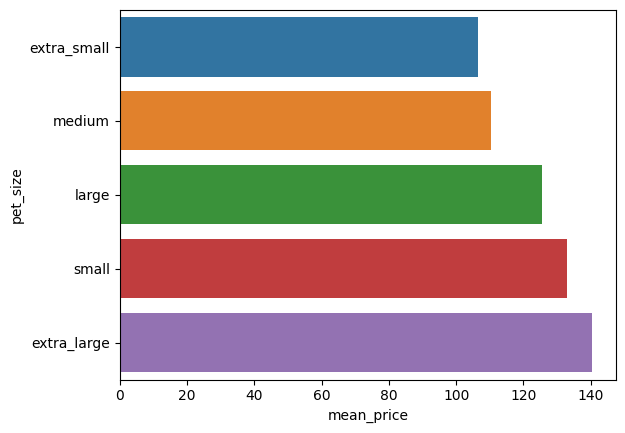

In [91]:
median_dog_products_df = dog_products_df.groupby('pet_size')['price'].median().sort_values(ascending=True).reset_index()
print(median_dog_products_df)
mean_dog_products_df = dog_products_df.groupby('pet_size')['price'].mean().sort_values(ascending=True).reset_index(name='mean_price')
sns.barplot(x='mean_price', y='pet_size',data=mean_dog_products_df)
plt.show()

# answer
As you can see the relationship between size and price
as Dog size is bigger the mean price is bigger too

# 3. Visualization:
- Create a box plot to visualize the distribution of price for each pet_size. This will help you compare not only the central tendency (median) but also the spread and potential outliers for each size category.

   rating  re_buy
0       1      21
1       2      27
2       3       9
3       4       6
4       5       3
5       6      12
6       7      28
7       8       4
8       9       9
9      10      51


/tmp/ipykernel_35/3926785576.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_of_re_buy = dog_products_df.groupby('price_range')['re_buy'].sum()
/tmp/ipykernel_35/3926785576.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_rating = dog_products_df.groupby(['price_range', 'rating'])['sales'].sum().reset_index()


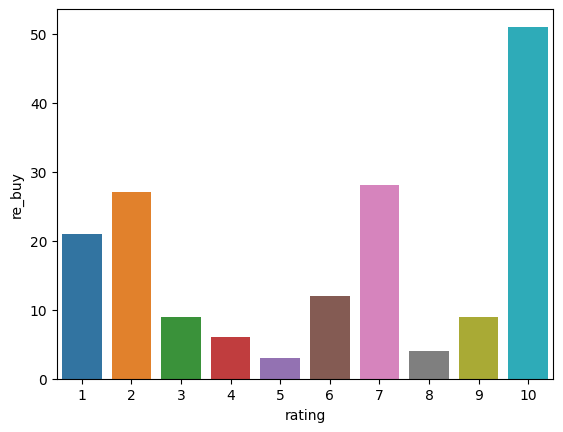

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


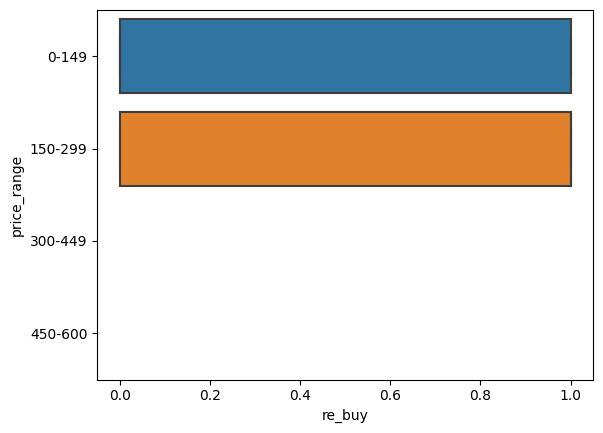

price_range
0-149      94
150-299    76
300-449     0
450-600     0
Name: re_buy, dtype: int64
   price_range  rating    sales
0        0-149       1  2586000
1        0-149       2  1909000
2        0-149       3   919000
3        0-149       4  1427000
4        0-149       5   753000
5        0-149       6  3567000
6        0-149       7  3302000
7        0-149       8   850000
8        0-149       9  1086000
9        0-149      10  6441000
10     150-299       1   666000
11     150-299       2  1573000
12     150-299       3   938000
13     150-299       4        0
14     150-299       5   258000
15     150-299       6  3070000
16     150-299       7  2715000
17     150-299       8  1395000
18     150-299       9   849000
19     150-299      10  5395000
20     300-449       1        0
21     300-449       2        0
22     300-449       3        0
23     300-449       4        0
24     300-449       5        0
25     300-449       6        0
26     300-449       7        0
27     30

In [102]:
re_buy_dog_products_df = dog_products_df.groupby('rating')['re_buy'].sum().reset_index(name='re_buy')
print(re_buy_dog_products_df)
bin = [0,149,299,449,600]
label = ['0-149','150-299','300-449','450-600']
dog_products_df['price_range'] = pd.cut(dog_products_df['price'], bins=bin,labels=label,include_lowest=True)
sns.barplot(data=re_buy_dog_products_df , x='rating',y='re_buy')
sum_of_re_buy = dog_products_df.groupby('price_range')['re_buy'].sum()
price_by_rating = dog_products_df.groupby(['price_range', 'rating'])['sales'].sum().reset_index()
plt.show()
sns.boxplot(data=dog_products_df, x='re_buy',y='price_range')
plt.show()
print(sum_of_re_buy)
print(price_by_rating)

In [ ]:
sns.boxplot(x='pet_size',y='price',data=dog_products_df)
plt.show()

# 4. Interpretation
- Based on your analysis and the box plot, describe the relationship between pet_size and price for dog products.

- Provide one business insight from your findings. For example, is the pricing strategy consistent across sizes, or are there any surprising patterns?

based on the boxplot of pet_size and price for dogs product

Small and Extra_large dogs products tend to be more expensive on average (higher median prices).

Medium dog products appear to be the least expensive on average.

people tend to re-buy product based on rating of products, higher rating products tend to sell more than once.
best selling products price range is between 0-149
